**The purpose of this notebook is to understand how a RF model makes its prediction and how to interpret the decision trees it produces. This exercise is less about understanding the exact mechanics of a RF and more focused on interpreting the results.**

# Random Forest

In [1]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

boston = load_boston()

In [2]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [3]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=2)
regr.fit(X_train, y_train)
predict = regr.predict(X_test)

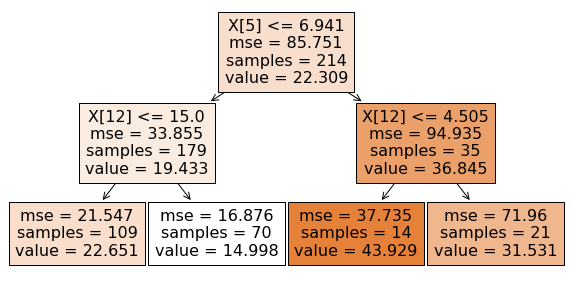

In [4]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(regr[0],
                   filled=True)

In [5]:
# Follow the tree for the first example
print(X_test[0,5])
print(X_test[0,12])
# leaf node value: 22.651

# Follow the tree for the second example
print(X_test[1,5])
print(X_test[1,12])
# leaf node value: 22.651

6.416
9.04
6.758
3.53


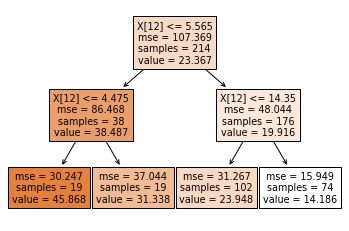

In [6]:
_ = tree.plot_tree(regr[1],
                   filled=True)

In [7]:
# Follow the tree for the first example
print(X_test[0,12])
print(X_test[0,12])
# leaf node value: 23.948

# Follow the tree for the second example
print(X_test[1,12])
print(X_test[1,12])
# leaf node value: 45.868

9.04
9.04
3.53
3.53


In [8]:
# We can see the predicted value is simply an average of the value in the leaf nodes

# Example 1
print(predict[0])
print((22.651 + 23.948)/2, "\n")

# Example 2
print(predict[1])
print((22.651 + 45.868)/2)

23.29968383017163
23.299500000000002 

34.25948072383949
34.2595


# Gradient Boosting

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [46]:
regr = GradientBoostingRegressor(n_estimators=2, max_depth=2, random_state=42)
regr.fit(X_train, y_train)

predict = regr.predict(X_test)

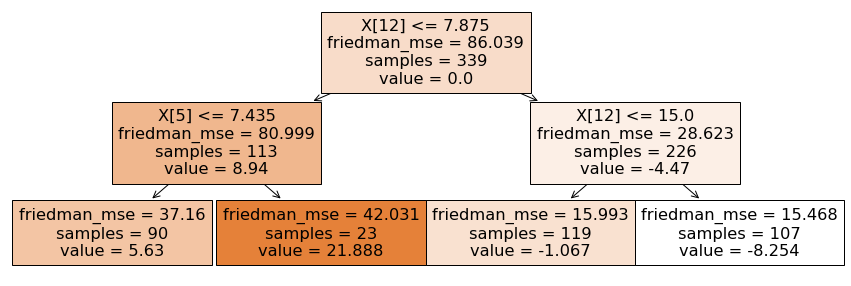

In [57]:
fig = plt.figure(figsize=(15,5))
_ = tree.plot_tree(regr.estimators_[0, 0],
                   filled=True)

In [48]:
print(X_test[0, 12])
print(X_test[0, 5])
# leaf node value: 5.63

print(X_test[1, 12])
print(X_test[1, 5])
# leaf node value: -1.067


7.34
6.333
9.53
6.216


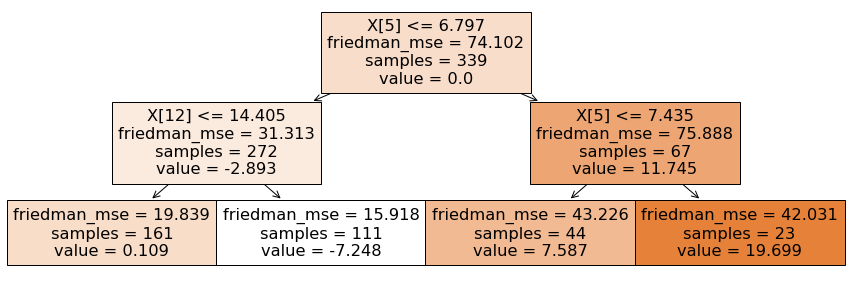

In [49]:
fig = plt.figure(figsize=(15,5))
_ = tree.plot_tree(regr.estimators_[1, 0],
                   filled=True)

In [50]:
print(X_test[0, 5])
print(X_test[0, 12])
# leaf node value: 0.109

print(X_test[1, 5])
print(X_test[1, 12])
# leaf node value: 0.109


6.333
7.34
6.216
9.53


In [93]:
# Example 1
print(22.8206 + (0.10 * 5.63) + (0.10 * 0.109)) # 22.8206 is the mean of y_train (see cell below)
print(predict[0], "\n")


# Example 2
print(22.8206 + (0.10 * -1.067) + (0.10 * 0.109))
print(predict[1])

23.394499999999997
23.39461276174443 

22.7248
22.724879801893824


In [98]:

print(y_train.mean())
print(regr.init_.predict(X_test)[0:5])

22.82064896755162
[22.82064897 22.82064897 22.82064897 22.82064897 22.82064897]
